In [11]:
from math import exp, sqrt, log
import numpy as np
import pandas as pd

from dictances import cosine
from dictances import bhattacharyya
from dictances import bhattacharyya_coefficient
from dictances import jensen_shannon
from dictances import kullback_leibler
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
df_glass = pd.read_csv('data/glass.csv')
df_glass.head()
df_glass2 = df_glass.round(2)
df_glass3 = df_glass.round(3)
df_glass4 = df_glass.round(4)

In [3]:
df_glass['label'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: label, dtype: int64

In [4]:
def hellinger(p, q):
    """Hellinger distance between two discrete distributions.
       Same as original version but without list comprehension
    """
    list_of_squares = []
    for p_i, q_i in zip(p, q):

        # caluclate the square of the difference of ith distr elements
        s = (sqrt(p_i) - sqrt(q_i)) ** 2

        # append 
        list_of_squares.append(s)

    # calculate sum of squares
    sosq = sum(list_of_squares)    

    return sosq / sqrt(2)

In [5]:
def bhattacharyya_distance(p, q):
    BC=np.sum(np.sqrt(p*q))
    h=np.sqrt(1-BC)
    b=-np.log(BC)
    return b

In [6]:
def wasserstein_dist(df, feature, label1, label2):
    dist= wasserstein_distance(df.loc[df['label']==label1, feature], df.loc[df['label']==label2, feature])
    return dist

def bhattacharyya_dist(df, feature, label1, label2):
    dist= bhattacharyya(df.loc[df['label']==label1, feature], df.loc[df['label']==label2, feature])
#     dist= bhattacharyya_distance(df.loc[df['label']==label1, feature], df.loc[df['label']==label2, feature])
    return dist

def jensen_shannon_dist(df, feature, label1, label2):
    dist= jensen_shannon(df.loc[df['label']==label1, feature], df.loc[df['label']==label2, feature])
    return dist

def hellinger_dist(df, feature, label1, label2):
    dist= hellinger(df.loc[df['label']==label1, feature], df.loc[df['label']==label2, feature])
    return dist

def flatten(t):
    return [item for sublist in t for item in sublist]

def execute_function(df, function_name, feature, label1, label2):
    return {
        'wasserstein_dist': lambda: wasserstein_dist(df, feature, label1, label2),
        'bhattacharyya_dist': lambda: bhattacharyya_dist(df, feature, label1, label2),
        'jensen_shannon_dist': lambda: jensen_shannon_dist(df, feature, label1, label2),
        'hellinger_dist': lambda: hellinger_dist(df, feature, label1, label2),
        'jm_dist': lambda: jm_dist(df, feature, label1, label2)
    }[function_name]()

In [7]:
def calc_dist(dist_func_name, df, target_col):
    features = df.columns.drop(target_col)
    classes = df[target_col].unique()
    distances = []
    for feature in features:
        class_dist = []
        for cls_feature1 in classes:    
            class_row = [execute_function(df, dist_func_name, feature, cls_feature1, cls_feature2) for cls_feature2 in classes]
            class_dist.append(class_row)
        distances.append(class_dist)

    two_d_mat = [flatten(distances[idx]) for idx in range(len(distances))]
    df_dists = pd.DataFrame(two_d_mat)
    return df_dists

In [17]:
df_dists = calc_dist('wasserstein_dist', df_glass, 'label')
df_dists.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.0,0.001308,0.000901,0.001776,0.002010,0.001695,0.001308,0.0,0.001008,0.002380,0.002717,0.001502,0.000901,0.001008,0.0,0.002087,0.002051,0.001125,0.001776,0.002380,0.002087,0.0,0.001777,0.002417,0.002010,0.002717,0.002051,0.001777,0.0,0.002311,0.001695,0.001502,0.001125,0.002417,0.002311,0.0
1,0.0,0.157703,0.257143,0.414593,1.404381,1.238828,0.157703,0.0,0.342949,0.299342,1.534956,1.330358,0.257143,0.342949,0.0,0.609367,1.209608,1.019493,0.414593,0.299342,0.609367,0.0,1.818974,1.614377,1.404381,1.534956,1.209608,1.818974,0.0,0.445441,1.238828,1.330358,1.019493,1.614377,0.445441,0.0
2,0.0,0.566887,0.079000,2.778582,2.246873,3.014153,0.566887,0.0,0.561161,2.228259,1.696550,2.463829,0.079000,0.561161,0.0,2.769683,2.237974,3.005254,2.778582,2.228259,2.769683,0.0,0.573248,0.421459,2.246873,1.696550,2.237974,0.573248,0.0,0.944521,3.014153,2.463829,3.005254,0.421459,0.944521,0.0
3,0.0,0.244301,0.106765,0.869989,0.331476,0.958901,0.244301,0.0,0.207508,0.625688,0.201784,0.714601,0.106765,0.207508,0.0,0.832670,0.274379,0.921582,0.869989,0.625688,0.832670,0.0,0.667179,0.354642,0.331476,0.201784,0.274379,0.667179,0.0,0.756092,0.958901,0.714601,0.921582,0.354642,0.756092,0.0
4,0.0,0.178109,0.215244,0.547385,0.655302,0.547419,0.178109,0.0,0.299280,0.501123,0.634722,0.461992,0.215244,0.299280,0.0,0.619367,0.801961,0.721237,0.547385,0.501123,0.619367,0.0,0.884274,0.660504,0.655302,0.634722,0.801961,0.884274,0.0,0.679425,0.547419,0.461992,0.721237,0.660504,0.679425,0.0
5,0.0,0.075368,0.041042,1.043604,0.447429,0.461291,0.075368,0.0,0.114582,1.001660,0.521053,0.501461,0.041042,0.114582,0.0,1.074389,0.406471,0.433550,1.043604,1.001660,1.074389,0.0,1.470000,1.144828,0.447429,0.521053,0.406471,1.470000,0.0,0.325172,0.461291,0.501461,0.433550,1.144828,0.325172,0.0
6,0.0,0.777992,0.169084,2.056187,1.020841,0.330754,0.777992,0.0,0.930588,1.980526,1.213187,1.025735,0.169084,0.930588,0.0,2.162172,1.126275,0.314280,2.056187,1.980526,2.162172,0.0,1.069060,1.998621,1.020841,1.213187,1.126275,1.069060,0.0,1.059004,0.330754,1.025735,0.314280,1.998621,1.059004,0.0
7,0.0,0.038496,0.011538,0.174978,0.012714,1.027286,0.038496,0.0,0.043498,0.162429,0.050263,0.996842,0.011538,0.043498,0.0,0.178869,0.008824,1.031176,0.174978,0.162429,0.178869,0.0,0.187692,0.894377,0.012714,0.050263,0.008824,0.187692,0.0,1.040000,1.027286,0.996842,1.031176,0.894377,1.040000,0.0
8,0.0,0.022737,0.013807,0.047176,0.057000,0.043552,0.022737,0.0,0.028529,0.056235,0.079737,0.066289,0.013807,0.028529,0.0,0.033756,0.057059,0.043611,0.047176,0.056235,0.033756,0.0,0.060769,0.049867,0.057000,0.079737,0.057059,0.060769,0.0,0.013448,0.043552,0.066289,0.043611,0.049867,0.013448,0.0


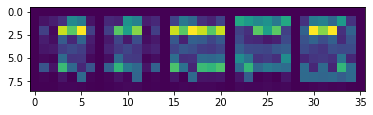

In [21]:
fig, ax = plt.subplots()
im = ax.imshow(df_dists)

In [16]:
df_dists = calc_dist('hellinger_dist', df_glass2, 'label')
df_dists.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.0,0.000116,0.000000,0.000023,0.000023,0.000012,0.000116,0.0,0.000012,0.000023,0.000023,0.000023,0.000000,0.000012,0.0,0.000023,0.000023,0.000012,0.000023,0.000023,0.000023,0.0,0.000012,0.000035,0.000023,0.000023,0.000023,0.000012,0.0,0.000035,0.000012,0.000023,0.000012,0.000035,0.000035,0.0
1,0.0,0.529149,0.155998,0.170119,0.261338,0.799224,0.529149,0.0,0.117387,0.155947,0.287671,0.846785,0.155998,0.117387,0.0,0.122175,0.359328,0.463916,0.170119,0.155947,0.122175,0.0,0.608187,0.591058,0.261338,0.287671,0.359328,0.608187,0.0,0.146732,0.799224,0.846785,0.463916,0.591058,0.146732,0.0
2,0.0,24.273515,0.047975,20.002179,9.161596,58.947738,24.273515,0.0,0.029262,19.806416,8.969792,56.673341,0.047975,0.029262,0.0,19.639645,8.954946,27.898304,20.002179,19.806416,19.639645,0.0,1.846028,4.250120,9.161596,8.969792,8.954946,1.846028,0.0,0.309081,58.947738,56.673341,27.898304,4.250120,0.309081,0.0
3,0.0,2.241336,0.363809,1.177831,0.461519,3.059686,2.241336,0.0,0.711707,0.756386,0.415756,1.561722,0.363809,0.711707,0.0,1.740133,0.772961,2.267471,1.177831,0.756386,1.740133,0.0,1.474949,0.786702,0.461519,0.415756,0.772961,1.474949,0.0,1.256420,3.059686,1.561722,2.267471,0.786702,1.256420,0.0
4,0.0,0.133477,0.034021,0.039393,0.034503,0.075588,0.133477,0.0,0.029164,0.045588,0.026013,0.066513,0.034021,0.029164,0.0,0.069084,0.033937,0.093586,0.039393,0.045588,0.069084,0.0,0.086394,0.122277,0.034503,0.026013,0.033937,0.086394,0.0,0.077028,0.075588,0.066513,0.093586,0.122277,0.077028,0.0
5,0.0,4.311139,0.967999,5.341824,3.111270,8.390564,4.311139,0.0,1.043020,5.346032,3.556747,10.362842,0.967999,1.043020,0.0,6.153589,2.588011,3.993218,5.341824,5.346032,6.153589,0.0,8.259007,10.372583,3.111270,3.556747,2.588011,8.259007,0.0,3.486036,8.390564,10.362842,3.993218,10.372583,3.486036,0.0
6,0.0,5.186994,0.136742,2.165534,0.597381,0.723304,5.186994,0.0,0.357677,2.119915,0.688719,0.788265,0.136742,0.357677,0.0,1.618672,0.428790,0.492723,2.165534,2.119915,1.618672,0.0,0.801091,1.483826,0.597381,0.688719,0.428790,0.801091,0.0,1.086031,0.723304,0.788265,0.492723,1.483826,1.086031,0.0
7,0.0,2.391941,0.106066,1.725341,0.000000,21.326341,2.391941,0.0,0.106066,1.725341,0.000000,21.326341,0.106066,0.106066,0.0,1.725341,0.000000,9.104129,1.725341,1.725341,1.725341,0.0,1.555635,6.973584,0.000000,0.000000,0.000000,1.555635,0.0,5.579073,21.326341,21.326341,9.104129,6.973584,5.579073,0.0
8,0.0,4.236274,1.232214,0.793049,0.183848,0.901852,4.236274,0.0,1.032376,0.968736,0.410122,1.299903,1.232214,1.032376,0.0,0.749533,0.190919,0.961665,0.793049,0.968736,0.749533,0.0,0.000000,0.733391,0.183848,0.410122,0.190919,0.000000,0.0,0.183848,0.901852,1.299903,0.961665,0.733391,0.183848,0.0


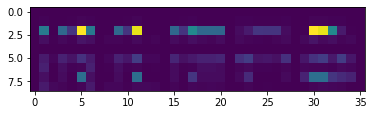

In [15]:
fig, ax = plt.subplots()
im = ax.imshow(df_dists)

### 1st step - Embedding 
Over the feature matrix (6x6 / 4x4 / 3x3) - CNN
Over the feature row (1x36) - AutoEncoder
Over the flatenned matrix -  Random Projections / DM

### 2nd step - Diffusion Maps
DM over the encoded matrix (9x36-->9x2 for example)
DM from https://datafold-dev.gitlab.io/datafold/intro.html

### 3rd step - plot

